<hr style='border: 1px solid black;'>

<p style='font-size: 22px; line-height: 2; margin: 10px 50px; text-align: center; color:purple;'> <b>Machine Learning parte 1:</b> Otimização de modelos através de hiperparâmetros</p>
    
<hr style='border: 1px solid black;'>

<p style='font-size: 14px; line-height: 2; margin: 10px 50px; text-align: left; color:black;'><i> Projeto desenvolvido por Gabriela Villagran durante o curso Machine Learning parte 1:</b> Otimização de modelos através de hiperparâmetros</i>

<p style='font-size: 22px; line-height: 2; margin: 10px 50px; text-align: justify; color:purple;'> <b>1. O que são hiperparâmetros?</b></p>

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'> Hiperparâmetros são parâmetros de modelos que devem ser definidos antes de treinar o modelo. Para isso existem diferentes técnicas que buscam otimizá-los que resultará uma melhor acurácia em seu modelo.

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'> Exemplos de hiperparâmetros: no caso de Random Forest modelos, um dos parâmetros será o número de árvores que será considerado. Para modelos de redes neurais, alguns parâmetros são taxa de aprendizado, número de camadas, quantidade de nó em cada camada entre outros. Para modelos como SVM e SVR, procuramos otmizar os parâmetros c, gamma e epsilon.

<p style='font-size: 22px; line-height: 2; margin: 2px 50px; text-align: justify; color:purple;'> <b>2. Sobre o Dataset </b></p>

<img src="./img/carro1.jpg" width="900">
    
<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'> Cada linha dos dados representa um veículo à venda em um site fictício de vendas de automóveis, durante o periodo de seis meses.
    
<li style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'> A primeira coluna representa o preço de cada veículo.</li>
    
<li style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'> A segunda, se ele foi vendido ou não. </li>
    
<li style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'>A terceira, quantos anos esse modelo tem; e a última, a média de KM esse carro rodou por ano. </b>

<p style='font-size: 22px; line-height: 2; margin: 10px 50px; text-align: justify; color:purple;'> <b>2.1 Importando Pandas, Numpy</b></p>
    
<a href = "https://pandas.pydata.org/docs/" style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'> Documentação Pandas </a>

<a href = "https://numpy.org/doc/stable/" style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'> Documentação Numpy </a>

In [1]:
import pandas as pd
import numpy as np

<p style='font-size: 22px; line-height: 2; margin: 10px 50px; text-align: justify; color:purple;'> <b>2.2 Importando Dados </b></p>


In [2]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv"

<p style='font-size: 22px; line-height: 2; margin: 10px 50px; text-align: justify; color:purple;'> <b> 2.3 Visualizando os dados</b>

In [3]:
dados = pd.read_csv(uri).drop(columns=["Unnamed: 0"], axis=1)

dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


In [4]:
# Tamanho dos dados
dados.shape

(10000, 4)

<p style='font-size: 22px; line-height: 2; margin: 2px 50px; text-align: justify; color:purple;'> <b> 3. Testando situações</b>

<p style='font-size: 22px; line-height: 2; margin: 10px 50px; text-align: justify; color:purple;'> <b> 3.1 Informação importante quando a aplicação do cross validation</b></p>

    
<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'> Dado um exemplo de validação cruzada com um cv = 10: </p>
<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'>Quando fazemos 10 vezes a validação cruzada, resultamos em 10 modelos diferentes. E qual desses 10 modelos queremos usar? Essa é uma pergunta delicada, e <b>a resposta é que não queremos utilizar nenhum deles.</b> Na validação cruzada, nós treinamos o algoritmo 10 vezes para termos uma estimativa de quão bem esse modelo funcionaria no mundo real. Agora, quando queremos o modelo propriamente dito para utilizarmos na vida real, devemos <b>treiná-lo</b>.</p>

<p style='font-size: 22px; line-height: 2; margin: 10px 50px; text-align: justify; color:purple;'> <b> 3.2 Testando uma situação de azar</b></p>
    
<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'> Os carros serão ordenados de forma crescente, de acordo com a feature "vendido", os não vendidos virão primeiro (0) e vendidos depois(1).

In [5]:
dados_azar = dados.sort_values('vendido', ascending=True)
dados_azar.head()

,preco,vendido,idade_do_modelo,km_por_ano
4999,74023.29,0,12,24812.80412
5322,84843.49,0,13,23095.63834
5319,83100.27,0,19,36240.72746
5316,87932.13,0,16,32249.56426
5315,77937.01,0,15,28414.50704


In [6]:
# Separando as variáveis explicativas 
x_azar = dados_azar[['preco', 'idade_do_modelo', 'km_por_ano']]

# Variável dependente 
y_azar = dados_azar['vendido']

<p style='font-size: 22px; line-height: 2; margin: 10px 50px; text-align: justify; color:purple;'> <b> 3.2.1 Validação cruzada  do modelo  *DummyClassifier*</b></p>

<a style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;' href = "https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html"> Documentação </a>

<p style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify; color:black;'> <b>DummyClassifier()</b> é uma boa alternativa nesses casos, principalmente pois, por padrão, ele já é estratificado, utilizando a proporção de 0 e 1 que aparecem nos dados para tentar fazer um julgamento - se aparecem muitos 0, ele vai tentar muitos 0; se aparecem muitos 1, tentará muitos 1.

In [7]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate

# Criando uma semente
SEED = 301
np.random.seed(SEED)

# Criando o modelo
modelo = DummyClassifier(strategy='stratified')

# Validação cruzada do modelo sem shuffle
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)

# Média
media = results['test_score'].mean()

# Desvio padrão
desvio_padrao = results['test_score'].std()

# Acurácia
print('Acurracy com dummy stratified, 10 = [%.2f, %.2f]' % ((media - 2 * desvio_padrao) * 100,
                                                            (media + 2 * desvio_padrao) * 100 ))


Acurracy com dummy stratified, 10 = [49.79, 53.45]


<p style='font-size: 22px; line-height: 2; margin: 10px 50px; text-align: justify; color:purple;'> <b> 3.2.2 Validação cruzada  do modelo  *DecisionTreeClassifier*</b></p>

<a style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;' href = "https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html"> Documentação cross validate</a>

<a style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;' href = "https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html"> Documentação TreeClassifier</a>

<img src="./img/Decision-Trees-Root-Node.png" width="900">


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

# Criando uma semente
SEED = 301
np.random.seed(SEED)

# Criando o modelo
modelo = DecisionTreeClassifier(max_depth=2)

# Validação cruzada do modelo sem shuffle
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)

# Média
media = results['test_score'].mean()

# Desvio padrão
desvio_padrao = results['test_score'].std()

# Acurácia
print('Acurracy com dummy stratified, 10 = [%.2f, %.2f]' % ((media - 2 * desvio_padrao) * 100,
                                                            (media + 2 * desvio_padrao) * 100 ))


Acurracy com dummy stratified, 10 = [73.83, 77.73]


<p style='font-size: 22px; line-height: 2; margin: 2px 50px; text-align: justify; color:purple;'> <b> 3.2.3 Gerando dados aleatórios para agrupamento</b>
    
<p style='font-size: 16px; line-height: 2; margin: 2px 50px; text-align: justify; color:black;'>A coluna "modelo" indica qual é o modelo de cada carro - uma variável categoria, na qual os elementos da amostra não possuem relação entre si. O modelo não foi utilizado para tentarmos prever o valor do carro, mas sim para verificar, dado que treinamos o algoritmo em diversos modelos de carro, quão bom ele seria em prever novos modelos de carros.

In [9]:
np.random.seed(SEED)
dados['modelo'] = dados.idade_do_modelo + np.random.randint(-2, 3, size=10000)
dados.modelo = dados.modelo + abs(dados.modelo.min()) + 1
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo
0,30941.02,1,18,35085.22134,18
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,14
3,95276.14,0,3,43167.32682,6
4,117384.68,1,4,12770.11290,5


In [10]:
def imprime_resultados(results):
    # Média
    media = results['test_score'].mean() * 100

    # Desvio padrão
    desvio = results['test_score'].std() * 100

    # Acurácia
    print("Accuracy média %.2f" % media)
    print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

<p style='font-size: 22px; line-height: 2; margin: 2px 50px; text-align: justify; color:purple;'> <b> 3.2.4 Validação cruzada com GroupKFold do modelo *DecisionTreeClassifier*</b>

In [11]:
# GroupKFold para analisar como o modelo se comporta com novos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados['modelo'], return_train_score=False)
imprime_resultados(results)

Accuracy média 75.78
Intervalo [73.67, 77.90]


<p style='font-size: 22px; line-height: 2; margin: 2px 50px; text-align: justify; color:purple;'> <b> 3.2.5 Validação cruzada com GroupKFold do modelo *SVC*</b>
    
<a style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;' href = "https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html"> Documentação </a>

In [12]:
# GroupKFold em um pipeline com StandardScaler e SVC

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
modelo = SVC()

pipeline = Pipeline([('transformacao',scaler), ('estimador',modelo)])

cv = GroupKFold(n_splits = 10)
results = cross_validate(pipeline, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy média 76.68
Intervalo [74.28, 79.08]


<p style='font-size: 22px; line-height: 2; margin: 2px 50px; text-align: justify; color:purple;'> <b> 4. Visualização gráfica dos modelos</b>
    

<p style='font-size: 22px; line-height: 2; margin: 2px 50px; text-align: justify; color:purple;'> <b> 4.1 Visualização do modelo *DecisionTreeClassifier* com a biblioteca *graphviz*</b>
    
<a style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;' href = "https://graphviz.readthedocs.io/en/stable/manual.html"> Documentação </a>

In [13]:
# Instalando o graphviz

#!pip install graphviz==0.9
#!pip install pydot

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

# Criando uma semente
SEED = 301
np.random.seed(SEED)

# Criando o modelo
modelo = DecisionTreeClassifier(max_depth=2)

# Treinamento do modelo
modelo.fit(x_azar, y_azar)

DecisionTreeClassifier(max_depth=2)

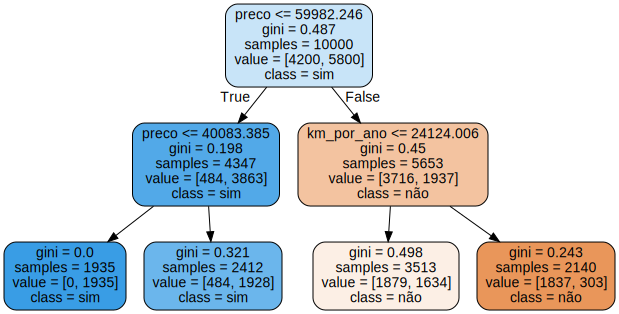

In [15]:
from sklearn.tree import export_graphviz
import graphviz

# feature_names = nome das features, colunas x
features = x_azar.columns

# out_file = não queremos jogar nenhum arquivo
# filled = preencher os retângulos da árvore de decisão
# rounded = arredondar os cantos
# class_names = nome das classes, não vendido e vendido
# feature_names = nome das features, colunas x
dot_data = export_graphviz(modelo,
                out_file=None,
                filled = True,
                rounded =True,
                class_names=['não','sim'],
                feature_names=features)

graph = graphviz.Source(dot_data)
graph

<p style='font-size: 18px; line-height: 2; margin: 2px 50px; text-align: justify; color:black;'> Aumentando para 3 a profundidade da árvore de decisão

Accuracy média 78.67
Intervalo [76.40, 80.94]


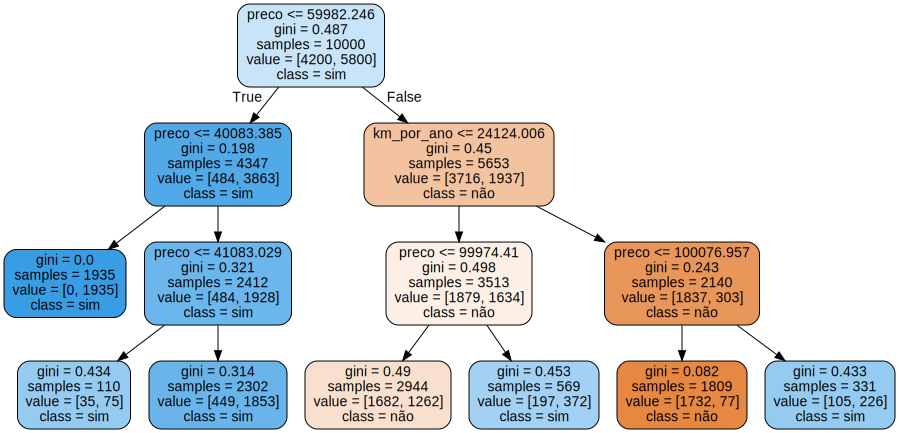

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
import graphviz

# GroupKFold para analisar como o modelo se comporta com novos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=3)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados['modelo'], return_train_score=False)
imprime_resultados(results)

# Treinamento do modelo
modelo.fit(x_azar, y_azar)


# feature_names = nome das features, colunas x
features = x_azar.columns

# out_file = não queremos jogar nenhum arquivo
# filled = preencher os retângulos da árvore de decisão
# rounded = arredondar os cantos
# class_names = nome das classes, não vendido e vendido
# feature_names = nome das features, colunas x
dot_data = export_graphviz(modelo,
                out_file=None,
                filled = True,
                rounded =True,
                class_names=['não','sim'],
                feature_names=features)

graph = graphviz.Source(dot_data)
graph

<p style='font-size: 18px; line-height: 2; margin: 2px 50px; text-align: justify; color:black;'> Aumentando para 4

Accuracy média 78.63
Intervalo [76.41, 80.86]


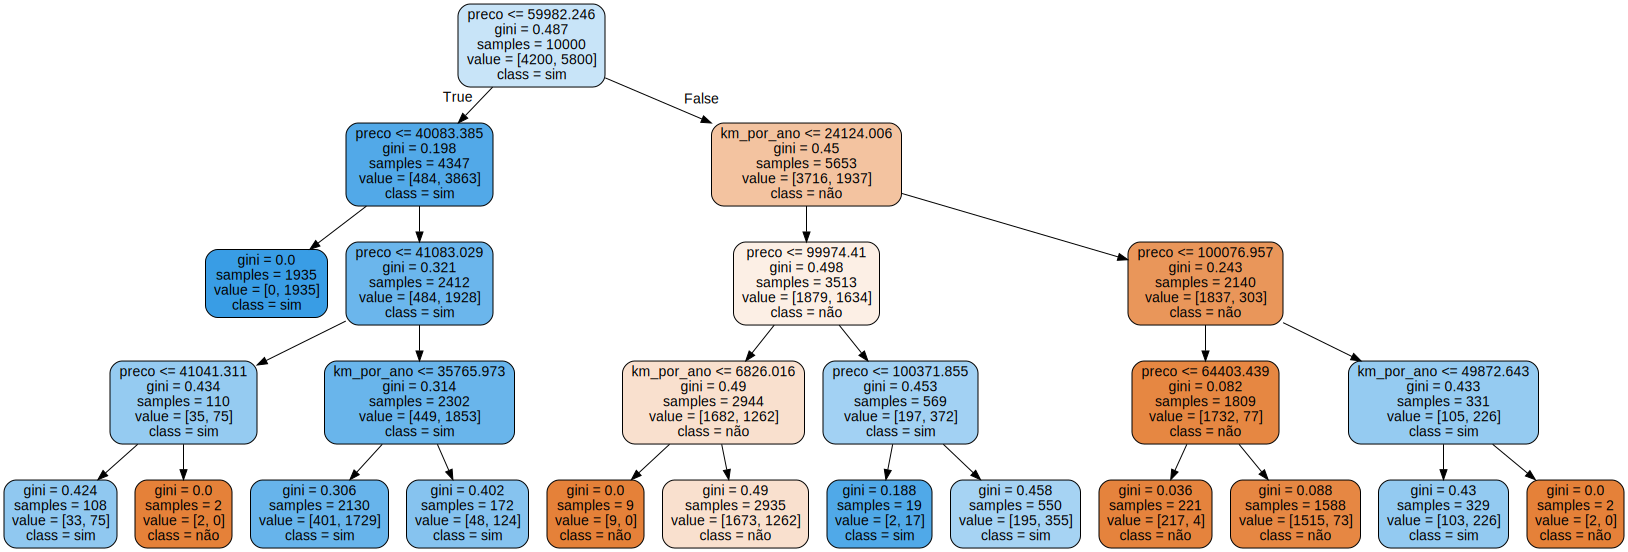

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
import graphviz

# GroupKFold para analisar como o modelo se comporta com novos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=4)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados['modelo'], return_train_score=False)
imprime_resultados(results)

# Treinamento do modelo
modelo.fit(x_azar, y_azar)


# feature_names = nome das features, colunas x
features = x_azar.columns

# out_file = não queremos jogar nenhum arquivo
# filled = preencher os retângulos da árvore de decisão
# rounded = arredondar os cantos
# class_names = nome das classes, não vendido e vendido
# feature_names = nome das features, colunas x
dot_data = export_graphviz(modelo,
                out_file=None,
                filled = True,
                rounded =True,
                class_names=['não','sim'],
                feature_names=features)

graph = graphviz.Source(dot_data)
graph

<p style='font-size: 16px; line-height: 2; margin: 2px 50px; text-align: justify; color:purple;'> Anteriormente, aprendemos que podemos fornecer parâmetros para nossos estimadores/classificadores (como max_depth) antes de eles serem treinados. Parâmetros que são definidos antes do treino são chamados de hiperparâmetros, e são diferentes de valores internos do modelo que vão sendo alterados de acordo com o que o modelo está aprendendo.

<p style='font-size: 22px; line-height: 2; margin: 2px 50px; text-align: justify; color:purple;'> <b> 4.2 Explorando hiperâmetros em 1 dimensão</b>

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
import graphviz

# GroupKFold para analisar como o modelo se comporta com novos grupos

from sklearn.model_selection import GroupKFold

def roda_arvore_de_decisao(max_depth):
    SEED = 301
    np.random.seed(SEED)

    cv = GroupKFold(n_splits = 10)
    modelo = DecisionTreeClassifier(max_depth=max_depth)
    results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados['modelo'], return_train_score=True)
    train_test = results['train_score'].mean() * 100
    test_score =  results['test_score'].mean() * 100
    print('max_depth = %d, treino = %.2f, teste = %.2f' %(max_depth, train_test,  test_score))
    tabela = [max_depth, train_test, test_score]
    return tabela

resultados_em_tabela = [roda_arvore_de_decisao(i) for i in range (1,33)]
resultados_em_tabela = pd.DataFrame(resultados_em_tabela, columns = ['max_depth', 'train', 'test'])
resultados_em_tabela

max_depth = 1, treino = 75.79, teste = 75.78
max_depth = 2, treino = 75.79, teste = 75.78
max_depth = 3, treino = 78.75, teste = 78.67
max_depth = 4, treino = 78.79, teste = 78.63
max_depth = 5, treino = 78.94, teste = 78.56
max_depth = 6, treino = 79.17, teste = 78.12
max_depth = 7, treino = 79.50, teste = 77.96
max_depth = 8, treino = 79.89, teste = 77.86
max_depth = 9, treino = 80.46, teste = 77.38
max_depth = 10, treino = 81.16, teste = 77.19
max_depth = 11, treino = 82.03, teste = 76.97
max_depth = 12, treino = 82.89, teste = 76.49
max_depth = 13, treino = 83.95, teste = 75.81
max_depth = 14, treino = 85.03, teste = 75.66
max_depth = 15, treino = 86.14, teste = 75.16
max_depth = 16, treino = 87.19, teste = 75.11
max_depth = 17, treino = 88.31, teste = 74.74
max_depth = 18, treino = 89.26, teste = 74.33
max_depth = 19, treino = 90.32, teste = 74.34
max_depth = 20, treino = 91.32, teste = 74.22
max_depth = 21, treino = 92.14, teste = 73.80
max_depth = 22, treino = 93.02, teste = 73.

,max_depth,train,test
0,1,75.791169,75.784219
1,2,75.791169,75.784219
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912
5,6,79.170115,78.123266
6,7,79.496806,77.963185
7,8,79.887810,77.857951
8,9,80.459009,77.376956
9,10,81.158994,77.194204


<p style='font-size: 16px; line-height: 2; margin: 2px 50px; text-align: justify; color:black;'>O que esperaríamos é que, quanto maior fosse a profundidade da árvore, mais decisões ela precisaria tomar e mais perfeito seria o seu treinamento em relação aos nossos testes. Porém, a partir de max_depth=3, que possui uma média 78.67, temos uma queda constante até max_depth = 32, que possui a média mais baixa, 72.52.
    
<p style='font-size: 16px; line-height: 2; margin: 2px 50px; text-align: justify; color:black;'>Isso acontece porque, quando treinamos a nossa árvore, ela aprende e cria as suas ramificações. Com profundidades muito grandes, a árvore se torna tão <b>perfeita para os dados de treino que falha nos dados de teste</b> - quase como se ela tivesse memorizado o teste.

<p style='font-size: 22px; line-height: 2; margin: 2px 50px; text-align: justify; color:purple;'> <b> 4.2.1 Gráfico da acurácia do train e test - exemplo de overfitting </b>
    
<a href = "https://seaborn.pydata.org/" style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Documentação</a>

Text(0, 0.5, 'Acurracy train and test')

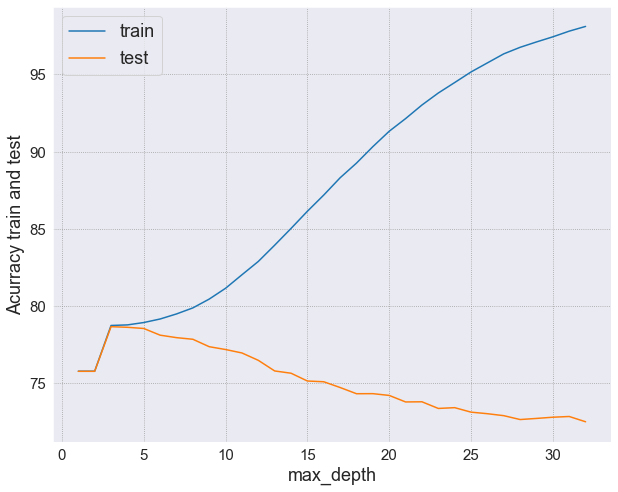

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Estilo
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

# Tamanho do gráfico
plt.figure(figsize = (10,8))

# Os resultados do train e test da árvore de decisão variando o max_depth
ax = sns.lineplot(x = 'max_depth', y='train', data = resultados_em_tabela)
ax2 = sns.lineplot(x = 'max_depth', y='test', data = resultados_em_tabela)

# Grid
plt.grid(True)

# Alterando o tamanho dos ticks dos labels
ax.tick_params(labelsize=15)

# Legenda
plt.legend(resultados_em_tabela.keys()[1:], fontsize=18)

# Aumentando as etiquetas
ax.set_xlabel( "max_depth" , size = 18)
ax.set_ylabel( "Acurracy train and test" , size = 18)

<p style='font-size: 16px; line-height: 2; margin: 2px 50px; text-align: justify; color:black;'>Podemos analisar que conforme aumentamos o max_depth, a média do treino vai ficando cada vez melhor, chegando a quase 100%. Porém, em determinado momento, o algoritmo começa a ficar tão exato para o modelo que deixa de ser adequado para os testes, com a média sendo cada vez menor.

<p style='font-size: 16px; line-height: 2; margin: 2px 50px; text-align: justify; color:black;'>Esse tipo de cenário é chamado de overfitting.

In [20]:
# Obtendo os melhores resultados de max_depth
resultados_em_tabela.sort_values('test', ascending=False).head()

,max_depth,train,test
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912
5,6,79.170115,78.123266
6,7,79.496806,77.963185


<p style='font-size: 16px; line-height: 2; margin: 2px 50px; text-align: justify; color:black;'> Acima estão os melhores valores de <i><b>max_depth</b></i>, serão as melhores árvores nessa situação. Até o momento, devemos entender max_depth é um exemplo de parâmetro de um algoritmo como a árvore decisão. Além disso, é perigoso varrermos demais os dados do treino e, consequentemente, prejudicarmos os resultados do teste.

<p style='font-size: 22px; line-height: 2; margin: 2px 50px; text-align: justify; color:purple;'> <b> 4.2.2 Revisando a exploração de um espaço de parâmetros </b>
    
    
<p style='font-size: 16px; line-height: 2; margin: 2px 50px; text-align: justify; color:black;'> Estudamos um parâmetro da árvore de decisão, chamado "profundidade máxima", testando-o com diversos valores dentro de um intervalo discreto. Com isso, descobrimos que a média da accuracy do nosso algoritmo teve uma fase de crescimento, mas rapidamente caiu conforme os valores foram aumentando.</p>

<p style='font-size: 16px; line-height: 2; margin: 2px 50px; text-align: justify; color:black;'> É impossível dizer que essa média sempre aumentaria ou diminuiria de acordo com os valores atribuídos aos parâmetros, já que isso depende muito do tipo de parâmetro e dos dados que estamos utilizando. De maneira a contornar isso, nossa alternativa foi realizar os testes com uma grande quantidade de valores.</p>

<p style='font-size: 16px; line-height: 2; margin: 2px 50px; text-align: justify; color:black;'> Apesar da quantidade de dados, nosso algoritmo foi razoavelmente rápido. Porém, o processo de treinar com validação cruzada utilizando grupos pode demorar mais tempo - por exemplo, 5 minutos para treinar e testar 1 valor de um parâmetro. Nesse caso, rodar o código 64 vezes levaria 5 horas e meia, e só então saberíamos qual desses valores foi melhor. E se esse processo levasse meia hora por cada valor?</p>

<p style='font-size: 16px; line-height: 2; margin: 2px 50px; text-align: justify; color:black;'> Existem opções, como distribuir os processos, rodá-los em paralelo ou na nuvem, mas o que queremos no momento é entender o que é o espaço de parâmetro e como otimizar esses espaços - não só o algoritmo, como também o tempo de busca dos melhores parâmetros nesse espaço.</p>

<p style='font-size: 16px; line-height: 2; margin: 2px 50px; text-align: justify; color:black;'> Uma das estratégias possíveis é pegar um parâmetro e varrer os dados com ele. Essa técnica tem suas vantagens e desvantagens, e é com ela que trabalharemos agora.</p>

<p style='font-size: 22px; line-height: 2; margin: 2px 50px; text-align: justify; color:purple;'> <b> 5. Explorando 2 parâmetros </b>
    
<p style='font-size: 16px; line-height: 2; margin: 2px 50px; text-align: justify; color:black;'> Um hiperparãmetro é um parâmetro que é setado previamente e que define a regra de criação da nossa árvore de decisão, como o próprio <i><b>max_depth</b></i>. Outro exemplo seria <i><b>min_samples_leaf</b></i>, que é número mínimo de elementos (samples) em uma folha.

<p style='font-size: 16px; line-height: 2; margin: 2px 50px; text-align: justify; color:black;'> As folhas são os últimos nós de uma árvore de decisão, a partir dos quais não ocorrem mais decisões. Um exemplo de uma árvore "perfeita" seria aquela em que todas as suas folhas contivessem somente um elemento - ou seja, na qual cada elemento tivesse uma classificação específica.

<p style='font-size: 16px; line-height: 2; margin: 2px 50px; text-align: justify; color:black;'> Mas não queremos que o número de samples seja muito baixo, pois isso faria com que o nosso algoritmo ficasse muito específico para o treino, não conseguindo generalizar tão bem para os testes. É para isso que serve o hiperparâmetro min_samples_leaf.

<p style='font-size: 16px; line-height: 2; margin: 2px 50px; text-align: justify; color:black;'> Nosso objetivo agora é explorarmos ambos os espaços de parâmetros, max_depth e min_samples_leaf, com diversos valores discretos.

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
import graphviz

# GroupKFold para analisar como o modelo se comporta com novos grupos

from sklearn.model_selection import GroupKFold

def roda_arvore_de_decisao(max_depth, min_samples_leaf):
    SEED = 301
    np.random.seed(SEED)
    cv = GroupKFold(n_splits = 10)
    modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf = min_samples_leaf)
    results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados['modelo'], return_train_score=True)
    train_test = results['train_score'].mean() * 100
    test_score =  results['test_score'].mean() * 100
    print('max_depth = %d, min_samples_leaf = %d, treino = %.2f, teste = %.2f' %(max_depth, min_samples_leaf, train_test,  test_score))
    tabela = [max_depth, min_samples_leaf, train_test, test_score]
    return tabela

def busca():
    resultados_em_tabela = []
    for max_depth in range(1,33):
        for min_samples_leaf in [32, 64, 128, 256]:
            tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
            resultados_em_tabela.append(tabela)

    resultados_em_tabela = pd.DataFrame(resultados_em_tabela, columns = ['max_depth', 'min_samples_leaf', 'train', 'test'])
    return resultados_em_tabela
    
resultados_em_tabela = busca()    
resultados_em_tabela.head()


max_depth = 1, min_samples_leaf = 32, treino = 75.79, teste = 75.78
max_depth = 1, min_samples_leaf = 64, treino = 75.79, teste = 75.78
max_depth = 1, min_samples_leaf = 128, treino = 75.79, teste = 75.78
max_depth = 1, min_samples_leaf = 256, treino = 75.79, teste = 75.78
max_depth = 2, min_samples_leaf = 32, treino = 75.79, teste = 75.78
max_depth = 2, min_samples_leaf = 64, treino = 75.79, teste = 75.78
max_depth = 2, min_samples_leaf = 128, treino = 75.79, teste = 75.78
max_depth = 2, min_samples_leaf = 256, treino = 75.79, teste = 75.78
max_depth = 3, min_samples_leaf = 32, treino = 78.75, teste = 78.67
max_depth = 3, min_samples_leaf = 64, treino = 78.75, teste = 78.67
max_depth = 3, min_samples_leaf = 128, treino = 78.75, teste = 78.67
max_depth = 3, min_samples_leaf = 256, treino = 78.75, teste = 78.67
max_depth = 4, min_samples_leaf = 32, treino = 78.75, teste = 78.67
max_depth = 4, min_samples_leaf = 64, treino = 78.75, teste = 78.67
max_depth = 4, min_samples_leaf = 128, tre

max_depth = 30, min_samples_leaf = 256, treino = 78.90, teste = 77.85
max_depth = 31, min_samples_leaf = 32, treino = 80.89, teste = 76.84
max_depth = 31, min_samples_leaf = 64, treino = 79.79, teste = 77.30
max_depth = 31, min_samples_leaf = 128, treino = 79.21, teste = 78.22
max_depth = 31, min_samples_leaf = 256, treino = 78.90, teste = 77.85
max_depth = 32, min_samples_leaf = 32, treino = 80.89, teste = 76.84
max_depth = 32, min_samples_leaf = 64, treino = 79.79, teste = 77.30
max_depth = 32, min_samples_leaf = 128, treino = 79.21, teste = 78.22
max_depth = 32, min_samples_leaf = 256, treino = 78.90, teste = 77.85


,max_depth,min_samples_leaf,train,test
0,1,32,75.791169,75.784219
1,1,64,75.791169,75.784219
2,1,128,75.791169,75.784219
3,1,256,75.791169,75.784219
4,2,32,75.791169,75.784219


<p style='font-size: 16px; line-height: 2; margin: 2px 50px; text-align: justify; color:black;'> O <i><b>min_samples_leaf</b></i> será setado em 32, 64, 128, 256, pois levaria muito tempo para um range de (1,33).Dessa forma, teremos apenas 32 x 4 = 128 pares de hiperparâmetros testados. Para analisarmos os resultados, vamos imprimir na tela a tabela dos melhores resultados:

In [22]:
# Obtendo os melhores resultados dos dados de teste com a variação do max_depth e min_samples_leaf
resultados_em_tabela.sort_values('test', ascending=False).head()

,max_depth,min_samples_leaf,train,test
15,4,256,78.750993,78.672633
12,4,32,78.750993,78.672633
14,4,128,78.750993,78.672633
13,4,64,78.750993,78.672633
8,3,32,78.750993,78.672633


<p style='font-size: 22px; line-height: 2; margin: 2px 50px; text-align: justify; color:purple;'> <b> 5.1 Matriz de correlação e explorando mais espaços de parâmetros</b>
    
<p style='font-size: 16px; line-height: 2; margin: 2px 50px; text-align: justify; color:black;'>Neste momento, temos uma tabela que indica a situação de dois parâmetros e quão bem um modelo foi no treino e no teste. Nossa dúvida é: como estão se comportando os resultados de treino e de teste em função dos valores de cada parâmetro?

In [23]:
# Obtendo a correlação dos valores da tabela
correlacao = resultados_em_tabela.corr().round(2)
correlacao

,max_depth,min_samples_leaf,train,test
max_depth,1.00,-0.00,0.54,-0.03
min_samples_leaf,-0.00,1.00,-0.41,0.35
train,0.54,-0.41,1.00,0.12
test,-0.03,0.35,0.12,1.00


<p style='font-size: 22px; line-height: 2; margin: 2px 50px; text-align: justify; color:purple;'> <b> 5.1.1 Matriz de correlação em gráficos</b>
 
<a href = "https://seaborn.pydata.org/generated/seaborn.heatmap.html" style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Documentação</a>
    

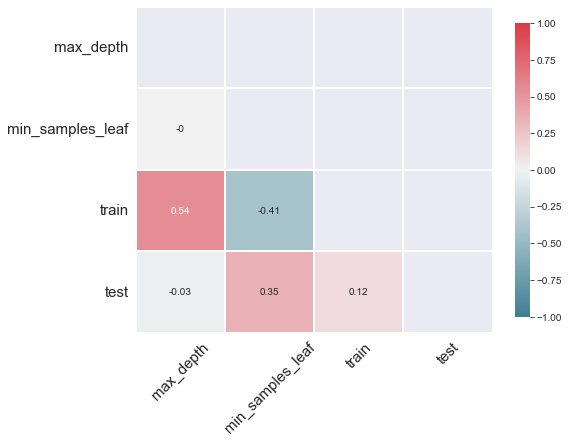

In [24]:
# Estilo
sns.set_palette('Accent')
sns.set_style('darkgrid')

# Criando a janela
fig, ax = plt.subplots(figsize = (8,6))

# Colormap
cmap = sns.diverging_palette(220, 10, as_cmap = True)

# Mascara
mask = np.tril(correlacao)

# Deixando apenas triangulo
mask = np.triu(np.ones_like(correlacao, dtype=bool))

# Criando o mapa de calor
ax = sns.heatmap(correlacao,
                 vmin = -1, vmax=1,
                 linewidths=1.5,
                 cmap = cmap,
                 annot = True,
                 xticklabels='auto',
                 mask=mask,
                 cbar_kws={"shrink": .9})

# Etiquetas    
ax.set_xticklabels(correlacao.keys(), rotation=45, ha='center', fontsize=15)
ax.set_yticklabels(correlacao.keys(),rotation=0, ha='right', fontsize=15)

# Mostrando
plt.show()

<p style='font-size: 16px; line-height: 2; margin: 2px 50px; text-align: justify; color:black;'> Nela, percebemos que parece existir uma correlação muito forte entre test e min_samples_leaf - quanto maior o min_samples_leaf, maior a qualidade do test.

<p style='font-size: 16px; line-height: 2; margin: 2px 50px; text-align: justify; color:black;'>Com esses dados em mãos, podemos então testar outros valores. Como obtivemos resultados melhores com <b>128 e 256</b>, vamos mantê-los, adicionando <b>192 e 512</b>. Após as outras visualizações isso será feito.

<p style='font-size: 16px; line-height: 2; margin: 2px 50px; text-align: justify; color:black;'>Existem outras maneiras de visualizarmos essa correlação. Outro tipo de comparação desses valores: uma matriz que mostra os pontos soltos (pandas.plotting.scatter_matrix).
    
<a href = "https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html" style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Documentação</a>

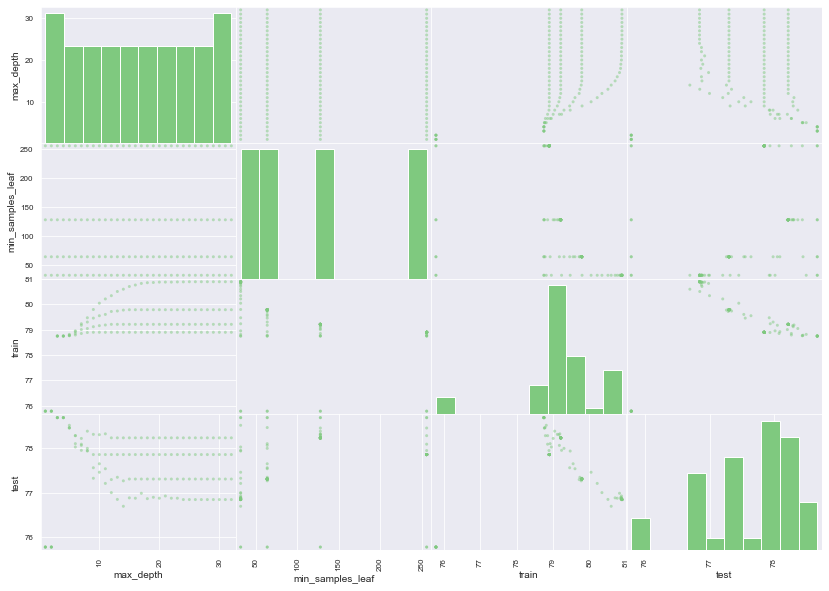

In [25]:
from pandas.plotting import scatter_matrix

pd.plotting.scatter_matrix(resultados_em_tabela, figsize = (14, 10), alpha = 0.5)

plt.show()

<p style='font-size: 16px; line-height: 2; margin: 2px 50px; text-align: justify; color:black;'>Na diagonal, são exibidos os histogramas dos valores. Por exemplo, para train, tivemos diversos resultados na faixa de 79%, e no test tivemos diversos valores na faixa de 78%. Já os gráficos que não compõem a diagonal são equivalentes à nossa correlação - à medida em que max_depth aumenta, o resultado de test cai e o resultado de train sobe, entre outras correlações.</p>
<br>
<p style='font-size: 16px; line-height: 2; margin: 2px 50px; text-align: justify; color:black;'>Outra visualização possível no Seaborn é o <i><b>pairplot()</b></i>, que plota os resultados pareados, de maneira muito parecida com nossa scatter_matrix.

<a href = "https://seaborn.pydata.org/generated/seaborn.pairplot.html" style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Documentação</a>
    

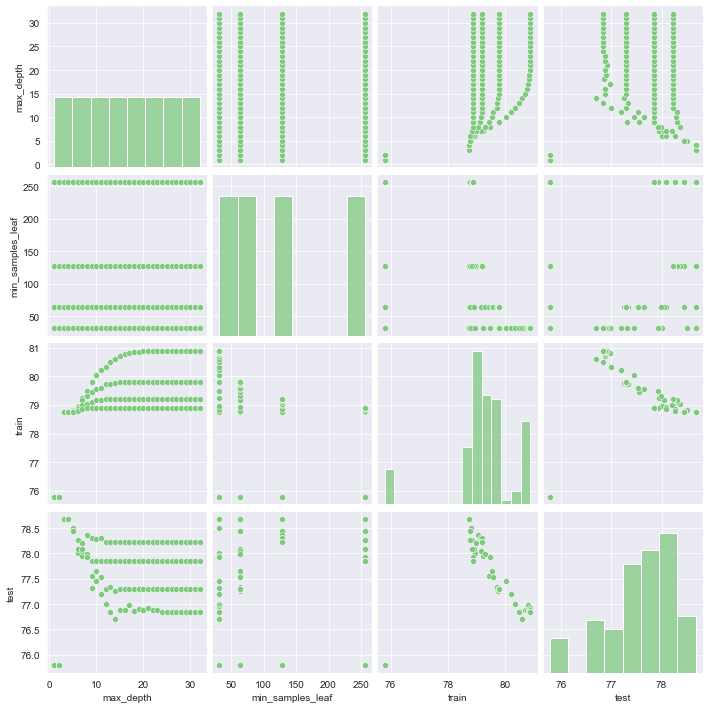

In [26]:
sns.pairplot(resultados_em_tabela)

<p style='font-size: 16px; line-height: 2; margin: 2px 50px; text-align: justify; color:black;'>Conclusões que podemos tirar a partir desses resultados:

<li style='font-size: 16px; line-height: 2; margin: 2px 50px; text-align: justify; color:black;'>quando max_depth cresce, o treino parece crescer também
<li style='font-size: 16px; line-height: 2; margin: 2px 50px; text-align: justify; color:black;'>quando min_samples_leaf cresce, o treino cai
<li style='font-size: 16px; line-height: 2; margin: 2px 50px; text-align: justify; color:black;'>quando max_depth sobe, o teste cai
<li style='font-size: 16px; line-height: 2; margin: 2px 50px; text-align: justify; color:black;'>quando min_samples_leaf sobe, o teste sobe</li>
    
<p style='font-size: 16px; line-height: 2; margin: 2px 50px; text-align: justify; color:black;'> Como obtivemos resultados melhores com <b>128 e 256</b>, vamos mantê-los, adicionando <b>192 e 512</b>.

<p style='font-size: 22px; line-height: 2; margin: 2px 50px; text-align: justify; color:purple;'> <b> 5.2 Alterando o parâmetro min_samples_leaf</b>

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
import graphviz

# GroupKFold para analisar como o modelo se comporta com novos grupos

from sklearn.model_selection import GroupKFold

def roda_arvore_de_decisao(max_depth, min_samples_leaf):
    SEED = 301
    np.random.seed(SEED)
    cv = GroupKFold(n_splits = 10)
    modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf = min_samples_leaf)
    results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados['modelo'], return_train_score=True)
    train_test = results['train_score'].mean() * 100
    test_score =  results['test_score'].mean() * 100
    print('max_depth = %d, min_samples_leaf = %d, treino = %.2f, teste = %.2f' %(max_depth, min_samples_leaf, train_test,  test_score))
    tabela = [max_depth, min_samples_leaf, train_test, test_score]
    return tabela

def busca():
    resultados_em_tabela = []
    for max_depth in range(1,33):
        for min_samples_leaf in [128, 192, 256, 512]:
            tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
            resultados_em_tabela.append(tabela)

    resultados_em_tabela = pd.DataFrame(resultados_em_tabela, columns = ['max_depth', 'min_samples_leaf', 'train', 'test'])
    return resultados_em_tabela
    
resultados_em_tabela = busca()    
resultados_em_tabela.head()


max_depth = 1, min_samples_leaf = 128, treino = 75.79, teste = 75.78
max_depth = 1, min_samples_leaf = 192, treino = 75.79, teste = 75.78
max_depth = 1, min_samples_leaf = 256, treino = 75.79, teste = 75.78
max_depth = 1, min_samples_leaf = 512, treino = 75.79, teste = 75.78
max_depth = 2, min_samples_leaf = 128, treino = 75.79, teste = 75.78
max_depth = 2, min_samples_leaf = 192, treino = 75.79, teste = 75.78
max_depth = 2, min_samples_leaf = 256, treino = 75.79, teste = 75.78
max_depth = 2, min_samples_leaf = 512, treino = 75.79, teste = 75.78
max_depth = 3, min_samples_leaf = 128, treino = 78.75, teste = 78.67
max_depth = 3, min_samples_leaf = 192, treino = 78.75, teste = 78.67
max_depth = 3, min_samples_leaf = 256, treino = 78.75, teste = 78.67
max_depth = 3, min_samples_leaf = 512, treino = 77.53, teste = 77.50
max_depth = 4, min_samples_leaf = 128, treino = 78.75, teste = 78.67
max_depth = 4, min_samples_leaf = 192, treino = 78.75, teste = 78.67
max_depth = 4, min_samples_leaf = 

max_depth = 30, min_samples_leaf = 256, treino = 78.90, teste = 77.85
max_depth = 30, min_samples_leaf = 512, treino = 77.53, teste = 77.50
max_depth = 31, min_samples_leaf = 128, treino = 79.21, teste = 78.22
max_depth = 31, min_samples_leaf = 192, treino = 79.01, teste = 78.05
max_depth = 31, min_samples_leaf = 256, treino = 78.90, teste = 77.85
max_depth = 31, min_samples_leaf = 512, treino = 77.53, teste = 77.50
max_depth = 32, min_samples_leaf = 128, treino = 79.21, teste = 78.22
max_depth = 32, min_samples_leaf = 192, treino = 79.01, teste = 78.05
max_depth = 32, min_samples_leaf = 256, treino = 78.90, teste = 77.85
max_depth = 32, min_samples_leaf = 512, treino = 77.53, teste = 77.50


,max_depth,min_samples_leaf,train,test
0,1,128,75.791169,75.784219
1,1,192,75.791169,75.784219
2,1,256,75.791169,75.784219
3,1,512,75.791169,75.784219
4,2,128,75.791169,75.784219


In [28]:
# Obtendo os melhores resultados dos dados de teste com a variação do max_depth e min_samples_leaf
resultados_em_tabela.sort_values('test', ascending=False).head()

,max_depth,min_samples_leaf,train,test
13,4,192,78.750993,78.672633
8,3,128,78.750993,78.672633
9,3,192,78.750993,78.672633
10,3,256,78.750993,78.672633
14,4,256,78.750993,78.672633


<p style='font-size: 22px; line-height: 2; margin: 2px 50px; text-align: justify; color:purple;'> <b> 5.2.1 Matriz de correlação após alterar o parametro min_samples_leaf</b>
 
<a href = "https://seaborn.pydata.org/generated/seaborn.heatmap.html" style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Documentação</a>

In [29]:
# Obtendo a correlação dos valores da tabela
correlacao = resultados_em_tabela.corr().round(2)
correlacao

,max_depth,min_samples_leaf,train,test
max_depth,1.00,0.00,0.35,0.24
min_samples_leaf,0.00,1.00,-0.64,-0.44
train,0.35,-0.64,1.00,0.91
test,0.24,-0.44,0.91,1.00


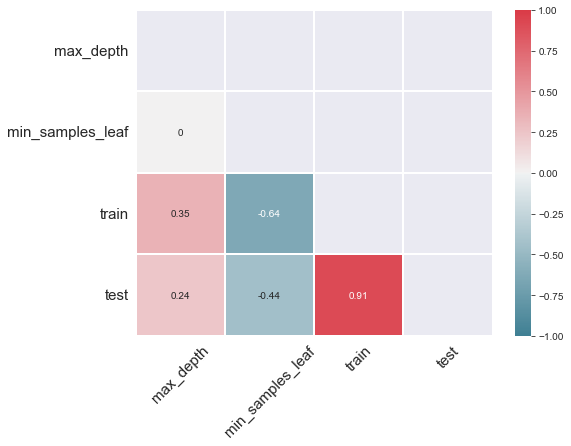

In [30]:
# Estilo
sns.set_palette('Accent')
sns.set_style('darkgrid')

# Criando a janela
fig, ax = plt.subplots(figsize = (8,6))

# Colormap
cmap = sns.diverging_palette(220, 10, as_cmap = True)

# Mascara
mask = np.tril(correlacao)

# Deixando apenas triangulo
mask = np.triu(np.ones_like(correlacao, dtype=bool))

# Criando o mapa de calor
ax = sns.heatmap(correlacao,
                 vmin = -1, vmax=1,
                 linewidths=1.5,
                 cmap = cmap,
                 annot = True,
                 xticklabels='auto',
                mask=mask)

# Etiquetas    
ax.set_xticklabels(correlacao.keys(), rotation=45, ha='center', fontsize=15)
ax.set_yticklabels(correlacao.keys(),rotation=0, ha='right', fontsize=15)

# Mostrando
plt.show()

<p style='font-size: 16px; line-height: 2; margin: 2px 50px; text-align: justify; color:black;'>Dessa vez, o resultado é uma correlação negativa entre min_samples_leaf e test.

<p style='font-size: 22px; line-height: 2; margin: 2px 50px; text-align: justify; color:purple;'> <b> 6. Explorando 3 hiperparâmetros </b>
    
<p style='font-size: 16px; line-height: 2; margin: 2px 50px; text-align: justify; color:black;'>Dessa vez, trabalharemos com <i><b>min_samples_split</b></i>. Antes, estávamos explorando o mínimo de samples em um nó final (a nossa "folha"), e agora exploraremos o mínimo de "quebras" (splits) que podemos ter no meio da árvore.
    
<p style='font-size: 16px; line-height: 2; margin: 2px 50px; text-align: justify; color:black;'>Outro fator que pode ser analisado é o tempo que a máquina virtual leva para treinar o algoritmo. O próprio <i><b>cross_validate()</b></i> tem, entre os seus resultados, a cronometragem do tempo. Portanto, basta extrairmos as variáveis referentes ao tempo e imprimirmos na tabela.

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
import graphviz

# GroupKFold para analisar como o modelo se comporta com novos grupos

from sklearn.model_selection import GroupKFold

def roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split):
    SEED = 301
    np.random.seed(SEED)
    cv = GroupKFold(n_splits = 10)
    modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf = min_samples_leaf, min_samples_split = min_samples_split)
    results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados['modelo'], return_train_score=True)
    fit_time = results['fit_time'].mean()
    score_time = results['score_time'].mean()
    train_test = results['train_score'].mean() * 100
    test_score =  results['test_score'].mean() * 100
    tabela = [max_depth, min_samples_leaf, min_samples_split, train_test, test_score, fit_time, score_time]
    return tabela

def busca():
    resultados_em_tabela = []
    for max_depth in range(1,33):
        for min_samples_leaf in [32, 64, 128, 256]:
            for min_samples_split in [32, 64, 128, 256]:
                tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split)
                resultados_em_tabela.append(tabela)

    resultados_em_tabela = pd.DataFrame(resultados_em_tabela, columns = ['max_depth',
                                                                         'min_samples_leaf',
                                                                         'min_samples_split',
                                                                         'train', 'test',
                                                                         'fit_time', 'score_time'])
    return resultados_em_tabela
    
resultados_em_tabela = busca()   

# Mostrando apenas os 5 primeiros
resultados_em_tabela.head()

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
0,1,32,32,75.791169,75.784219,0.004801,0.0014
1,1,32,64,75.791169,75.784219,0.004501,0.0013
2,1,32,128,75.791169,75.784219,0.004701,0.0012
3,1,32,256,75.791169,75.784219,0.004401,0.0013
4,1,64,32,75.791169,75.784219,0.004501,0.0013


<p style='font-size: 22px; line-height: 2; margin: 2px 50px; text-align: justify; color:purple;'> <b> 6.1 Matriz de correlação adicionando o hiperparâmetro min_samples_split</b>

In [32]:
# Obtendo a correlação dos valores da tabela
correlacao = resultados_em_tabela.corr().round(2)
correlacao

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
max_depth,1.00,0.00,0.00,0.53,0.01,0.58,0.23
min_samples_leaf,0.00,1.00,0.00,-0.34,0.29,-0.51,-0.12
min_samples_split,0.00,0.00,1.00,-0.13,0.13,-0.06,-0.07
train,0.53,-0.34,-0.13,1.00,0.25,0.90,0.35
test,0.01,0.29,0.13,0.25,1.00,-0.01,0.06
fit_time,0.58,-0.51,-0.06,0.90,-0.01,1.00,0.39
score_time,0.23,-0.12,-0.07,0.35,0.06,0.39,1.00


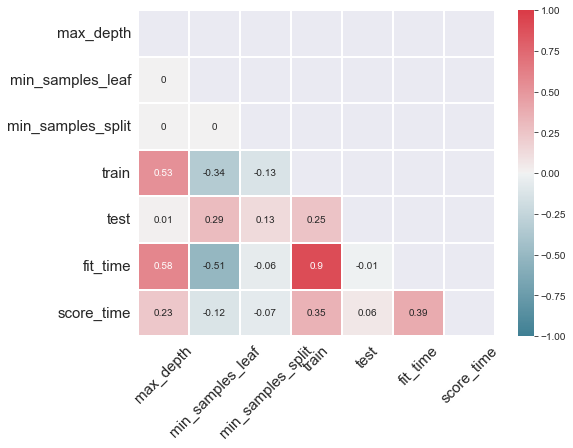

In [33]:
# Estilo
sns.set_palette('Accent')
sns.set_style('darkgrid')

# Criando a janela
fig, ax = plt.subplots(figsize = (8,6))

# Colormap
cmap = sns.diverging_palette(220, 10, as_cmap = True)

# Mascara
mask = np.tril(correlacao)

# Deixando apenas triangulo
mask = np.triu(np.ones_like(correlacao, dtype=bool))

# Criando o mapa de calor
ax = sns.heatmap(correlacao,
                 vmin = -1, vmax=1,
                 linewidths=1.5,
                 cmap = cmap,
                 annot = True,
                 xticklabels='auto',
                mask=mask)

# Etiquetas    
ax.set_xticklabels(correlacao.keys(), rotation=45, ha='center', fontsize=15)
ax.set_yticklabels(correlacao.keys(),rotation=0, ha='right', fontsize=15)

# Mostrando
plt.show()

In [34]:
# Obtendo os melhores resultados com os parametros max_depth, min_samples_leaf, min_samples_split
resultados_em_tabela.sort_values('test', ascending=False).head()

,max_depth,min_samples_leaf,min_samples_split,train,test,fit_time,score_time
63,4,256,256,78.750993,78.672633,0.010302,0.001600
48,4,32,32,78.750993,78.672633,0.010202,0.001301
34,3,32,128,78.750993,78.672633,0.008602,0.001500
35,3,32,256,78.750993,78.672633,0.009102,0.001201
36,3,64,32,78.750993,78.672633,0.008702,0.001401


<p style='font-size: 16px; line-height: 2; margin: 2px 50px; text-align: justify; color:black;'>Repare que existe uma pequena diferença entre os tempos de treino e os treinos de teste. Nesse caso, nosso treino é tão rápido que essas diferenças são insignificantes. Porém, se tivéssemos um algoritmo que demora 30 minutos para fazer o treinamento e no qual o tempo de teste fosse muito alto, talvez valesse a pena escolhermos os valores com base nesses resultados.

<p style='font-size: 22px; line-height: 2; margin: 2px 50px; text-align: justify; color:purple;'> <b> 7.  Usando o GridSearchCV</b>
    
     
<a href = "https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html" style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Documentação</a>
    
<p style='font-size: 16px; line-height: 2; margin: 2px 50px; text-align: justify; color:black;'>Agora que já aprendemos a importância de uma busca em grid pelos parâmetros que maximizam a métrica que estamos utilizando no nosso sistema, queremos utilizar uma ferramenta que nos ajude nesse processo.

<p style='font-size: 16px; line-height: 2; margin: 2px 50px; text-align: justify; color:black;'>O próprio SKLearn possui o <i><b>GridSearchCV (grid search cross validation)</b></i>, que faz justamente essa busca de hiperparâmetros com validação cruzada.

<p style='font-size: 16px; line-height: 2; margin: 2px 50px; text-align: justify; color:black;'>Para isso, importaremos o GridSearchCV do sklearn.model_selection. Em seguida, determinaremos o SEED como 301 (mantendo o mesmo seed padrão) e definiremos o nosso espaco_de_parametros.

In [35]:
from sklearn.model_selection import GridSearchCV

# Criando semente
SEED = 301
np.random.seed(SEED)

# Estaremos explorando 4 dimensões diferentes que resultam em 36 combinações.
espaco_de_parametros = { 'max_depth': [3,5],
                        'min_samples_split':[32,64,128],
                        'min_samples_leaf': [32,64,128],
                        'criterion' : ['gini', 'entropy']}


# Será passado tabmém o cross validation com 10 splits (cv = GroupKFold(n_split = 10)).
busca = GridSearchCV(DecisionTreeClassifier(), espaco_de_parametros, cv = GroupKFold(n_splits= 10))

# Rodando o cross validate
busca.fit(x_azar, y_azar, groups=dados['modelo'])

resultados= pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008602,0.000490,0.001501,0.000500,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
1,0.008402,0.000490,0.001300,0.000459,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
2,0.008302,0.000640,0.001700,0.000458,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
3,0.009002,0.001000,0.001300,0.000458,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
4,0.008602,0.000663,0.001400,0.000490,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1


In [36]:
# Mostrando os melhores parâmetros
print(busca.best_params_)

# Melhor acurácia
print(busca.best_score_.round(4) * 100 ,'%')

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 32, 'min_samples_split': 32}
78.67 %


In [37]:
# Buscando o melhor estimador
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

In [38]:
from sklearn.metrics import accuracy_score

# EVITAR ESSA ABORDAGEM, pois ela é otimista e queremos uma abordagem realista, não queremos viciar nos dados que o modelo ja viu
predicoes = melhor.predict(x_azar)
acurracy = accuracy_score(predicoes, y_azar) * 100

print('Accuracy para os dados foi %.2f%%' % acurracy )

Accuracy para os dados foi 78.75%


<p style='font-size: 16px; line-height: 2; margin: 2px 50px; text-align: justify; color:black;'>Utilizamos o GridSearchCV do SKLearn para encontrarmos o melhor conjunto de hiperparâmetros em um espaço definido, de modo a otimizar a nossa métrica (accuracy). Quando tentamos analisar quão bem nosso algoritmo se sairia no mundo real, pegamos o melhor conjunto (representado por melhor) e utilizamos um predict() em cima de x_azar - ou seja, com todos os dados e uma única vez. Porém, durante o nosso processo de aprendizado, utilizamos o cross validation, e existem alguns cuidados que devemos tomar a esse respeito.

<p style='font-size: 22px; line-height: 2; margin: 2px 50px; text-align: justify; color:purple;'> <b> 8. Nested cross validation e validando o melhor modelo</b>
    
<p style='font-size: 16px; line-height: 2; margin: 2px 50px; text-align: justify; color:black;'>Na documentação do SKLearn, encontramos uma seção sobre <i><b>nested versus non-nested cross-validation</b></i>. O texto afirma que quando estamos utilizando hiperparâmetros, fazendo, por exemplo, o GridSearchCV junto com o cross_validation_score, não devemos descobrir a nossa métrica por meio do predict(), mas sim com outro cross_valiation_score.</p>

<p style='font-size: 16px; line-height: 2; margin: 2px 50px; text-align: justify; color:black;'>Utilizar o predict() acaba sendo muito otimista, pois acabamos incorrendo em um vício sobre os dados que já tínhamos visto. Portanto, essa abordagem deve ser evitada.</p>

<p style='font-size: 16px; line-height: 2; margin: 2px 50px; text-align: justify; color:black;'>No nosso novo teste, importaremos cross_val_score de sklearn.model_selection. Em seguida, chamaremos cross_val_score(), passando busca, x_azar e y_azar. O cross validation será o mesmo que estávamos utilizando anteriormente (GroupKFold(n_splits=10), e os grupos serão dados.modelo.</p>

<p style='font-size: 22px; line-height: 2; margin: 2px 50px; text-align: justify; color:purple;'> <b> 8.1 Obtendo estimativas com dados que não foram vistos </b>
    
<a href = "https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html" style='font-size: 16px; line-height: 2; margin: 10px 50px; text-align: justify;'>Documentação</a>
    
<p style='font-size: 16px; line-height: 2; margin: 2px 50px; text-align: justify; color:black;'>No caso de cross validation com busca de hiperparâmetros, fazemos uma nova validação cruzada. Chama-se <i><b>nested cross validation.</b></i>
    
    

In [39]:
from sklearn.model_selection import cross_val_score


scores = cross_val_score(busca, x_azar, y_azar, cv = GroupKFold(n_splits=10), groups = dados['modelo'])

E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\anaconda\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "E:\anaconda\lib\site-packages\sklearn\model_selection\_search.py", line 841, in fit
    self._run_search(evaluate_candidates)
  File "E:\anaconda\lib\site-packages\sklearn\model_selection\_search.py", line 1296, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "E:\anaconda\lib\site-packages\sklearn\model_selection\_search.py", line 807, in evaluate_candidates
    (split_idx, (train, test)) in product(
  File "E:\anaconda\lib\site-packages\sklear

<p style='font-size: 16px; line-height: 2; margin: 2px 50px; text-align: justify; color:black;'> Infelizmente como o Pandas não suporta nested cross validation com group K fold, não conseguimos prever o resultado para novos grupos. Desta maneira, será passado o K fold comum.

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

SEED=301
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "criterion": ["gini", "entropy"]

}

busca = GridSearchCV(DecisionTreeClassifier(),
                    espaco_de_parametros,
                    cv = KFold(n_splits = 5, shuffle=True))

busca.fit(x_azar, y_azar)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007801,0.000400,0.0018,0.00040,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
1,0.008602,0.000800,0.0014,0.00049,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
2,0.008402,0.000490,0.0014,0.00049,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
3,0.008002,0.000633,0.0016,0.00049,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
4,0.007802,0.000400,0.0014,0.00049,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1


In [42]:
from sklearn.model_selection import cross_val_score

# Aplicando novamente o cross_val_score tendo alterado o K fold.
scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits=5, shuffle = True))
scores

array([0.7795, 0.7905, 0.786 , 0.791 , 0.788 ])

<p style='font-size: 16px; line-height: 2; margin: 2px 50px; text-align: justify; color:black;'> Acima estão os resultados da acurrácia dos 5 splits, comm eles é possível reconstruir a média e o intervalo. Para isso, criaremos uma função <i><b>imprime_scores()</b></i> que recebe scores. Na media, usaremos <i><b>scores.mean() * 100</b></i>, e no desvio <i><b>scores.std() * 100.</b></i>

In [43]:
# Criando a função
def imprime_score(scores):
    # Média
    media = scores.mean() * 100

    # Desvio padrão
    desvio = scores.std() * 100

    # Acurácia
    print("Accuracy média %.2f" % media)
    print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

In [44]:
imprime_score(scores)

Accuracy média 78.70
Intervalo [77.87, 79.53]


In [47]:
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

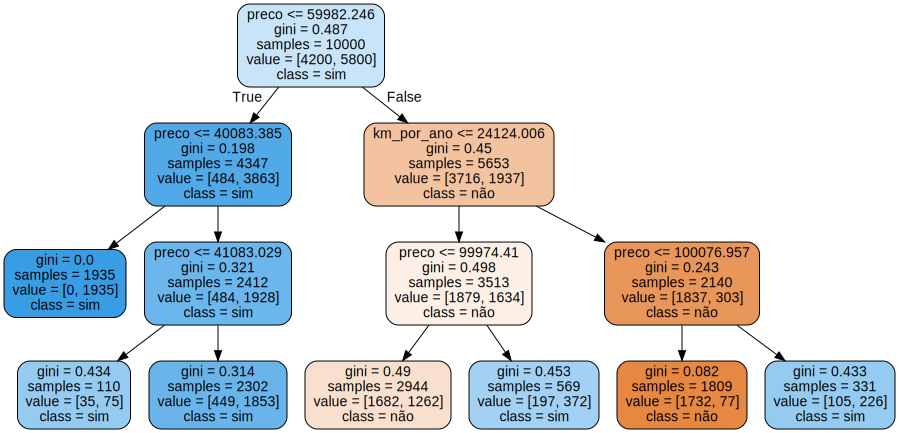

In [48]:
# Fazendo a arvore de decisão do melhor modelo

from sklearn.tree import export_graphviz
import graphviz

# feature_names = nome das features, colunas x
features = x_azar.columns

# out_file = não queremos jogar nenhum arquivo
# filled = preencher os retângulos da árvore de decisão
# rounded = arredondar os cantos
# class_names = nome das classes, não vendido e vendido
# feature_names = nome das features, colunas x
dot_data = export_graphviz(melhor,
                out_file=None,
                filled = True,
                rounded =True,
                class_names=['não','sim'],
                feature_names=features)

graph = graphviz.Source(dot_data)
graph

<p style='font-size: 16px; line-height: 2; margin: 2px 50px; text-align: justify; color:black;'>A árvore tem 3 níveis de profundidade (max_depth=3, ou seja, três decisões a serem tomadas), e as folhas e os splits (min_samples_leaf e min_samples_split, respectivamente) têm um mínimo de 32 samples cada. Além disso, as decisões de quebras seguem o critério de gini ao invés de entropy.